# 401 主成分分析法PCA（principal Component Analysis）

* 一个非监督的机器学习方法
* 主要用于数据的降维
* 通过降维，可以发现更便于人类理解的特征
* 其他应用： 可视化；去噪

### 步骤
1. 将样例的均值归为 0 （demean）
2. 最大化目标函数：$Var(X_{project})=\frac{1}{m}\sum_{i=1}^m \left(X^{(i)} \cdot w \right)^2$
### 与线性回归的区别
<figure class="half">
    <img src='./image/1.png' style='zoom:50%'>
    <img src='./image/2.png' style='zoom:50%'>
</figure>


## 使用梯度上升发解决PCA
$$\nabla J =\frac{2}{m}\cdot X^T \cdot \left(Xw\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

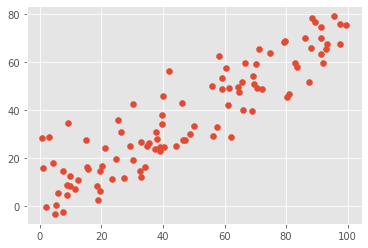

In [3]:
plt.scatter(X[:,0],X[:, 1])

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

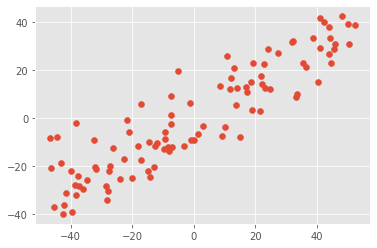

In [5]:
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])

In [6]:
print(np.mean(X_demean[:,0]),np.mean(X_demean[:,1]))

-5.4001247917767615e-15 -5.684341886080802e-16


### 梯度上升法

In [7]:
def f(w, X):
    return  np.sum((X.dot(w)) ** 2) /len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):     # 考虑到 w 为单位向量，数值较小，所以调小epsilon
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)              # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
    
    return w

In [8]:
initial_w = np.random.random(X.shape[1])     # 注意2：不能用0向量开始
initial_w

array([0.66832472, 0.14354815])

In [9]:
eta = 0.001
# 注意3：不能使用StandardScaler标准化数据    就是为了求方差最大。
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.80494321, 0.59335186])

In [10]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.80494321, 0.59335186])

In [11]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

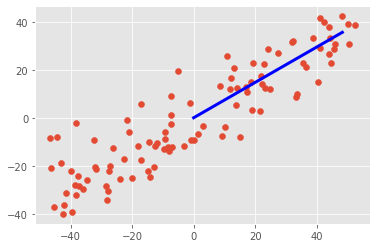

In [12]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0, w[0]*60],[0, w[1]*60], color='b', linewidth=3)

### 使用极端数据集测试

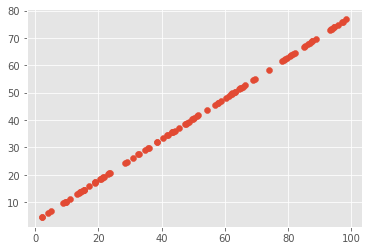

In [13]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.
plt.scatter(X2[:,0], X2[:,1])

In [14]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

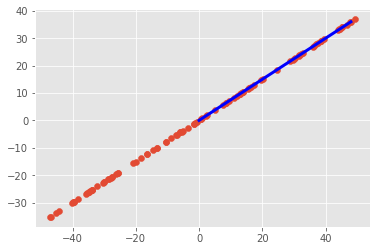

In [15]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0, w2[0]*60],[0, w2[1]*60], color='b', linewidth=3)

同学们可以自己思考实现随机梯度下降法和小批量梯度下降法的版本：）

## 获得n个主成分

In [16]:
import numpy as np
import matplotlib.pyplot as plt

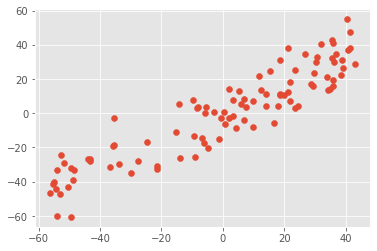

In [17]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)
plt.scatter(X[:,0], X[:,1])

In [18]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [19]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.76464529, 0.64445138])

In [20]:
'''
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w
'''
X2 = X - X.dot(w).reshape(-1,1) * w

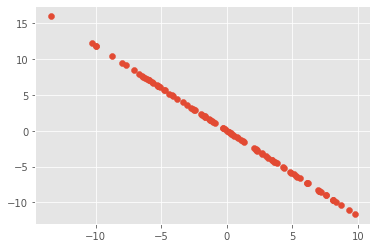

In [21]:
plt.scatter(X2[:,0],X2[:,1])

In [22]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.64445464, -0.76464254])

In [24]:
w.dot(w2)    # 验证 乘积等于 0

4.268463091872121e-06

### 进一步封装

In [25]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [26]:
first_n_components(2, X)

[array([0.76464527, 0.64445141]), array([-0.64444736,  0.76464868])]